# Retail Sales Analysis of ABC Private Limited

# AIM :
To predict the purchase amount of customers hence create personalized offers.


## Business Understanding
Retail and sales are the heartbeat of commerce, where products meet customers and desires are fulfilled. Every purchase is a vote of confidence, driving businesses to innovate, adapt, and thrive in an ever-changing market.



## Fields:
User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years, Marital_Status,Product_Category_1,Product_Category_2,Purchase


# Data Understanding

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales = pd.read_csv("train.csv")

In [3]:
#Checking first 10 rows of the data 
sales.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
#Checking bottom 10 rows of the data
sales.tail(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550058,1006024,P00372445,M,26-35,12,A,0,1,20,NaN,NaN,121
550059,1006025,P00370853,F,26-35,1,B,1,0,19,NaN,NaN,48
550060,1006026,P00371644,M,36-45,6,C,1,1,20,NaN,NaN,494
550061,1006029,P00372445,F,26-35,1,C,1,1,20,NaN,NaN,599
550062,1006032,P00372445,M,46-50,7,A,3,0,20,NaN,NaN,473
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [5]:
#Quick inspection of the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#summary statistics
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
#Summary of the data
sales.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [8]:
### Checking the shape of a data frame
sales.shape

(550068, 12)

In [9]:
#Removing all blank rows
sales = sales.dropna(how='all')
sales

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [10]:
#Check for number of  duplicate entries
sales.duplicated().sum()

0

In [11]:
#checking for null values
sales.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [12]:
for col in sales.columns:
    print(col)

User_ID
Product_ID
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category_1
Product_Category_2
Product_Category_3
Purchase


In [13]:
#checking unique values
print(sales.nunique())

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64


In [14]:
#Converting Data Types in Columns
sales["Gender"]= sales["Gender"].astype("category")
sales["City_Category"]= sales["City_Category"].astype("category")

In [15]:
sales.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                             object
Occupation                       int64
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                   int64
Product_Category_1               int64
Product_Category_2             float64
Product_Category_3             float64
Purchase                         int64
dtype: object

In [16]:
#checking for count of null values
sales.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [17]:
sales.shape

(550068, 12)

In [18]:
sales['Product_Category_2']

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 550068, dtype: float64

In [19]:
sales.drop(columns=["Product_Category_3"],inplace=True)

In [20]:
#calculate mean for Product_category_2
mean_cat2 = sales['Product_Category_2'].mean()


In [21]:
# Fill null values in Product_Category_2 with mean
sales['Product_Category_2'].fillna(mean_cat2, inplace=True)

In [22]:
sales

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,365


#### Trimming the + sign from the Stay_In_Current_City_Years column

In [23]:
# Trimming the + sign from the Stay_In_Current_City_Years column
sales['Stay_In_Current_City_Years'] = sales['Stay_In_Current_City_Years'].str.replace('+', '')

In [24]:
sales.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,1057
4,1000002,P00285442,M,55+,16,C,4,0,8,9.842329,7969


In [25]:
# # Saving to a csv
# sales.to_csv("/Users/mac/Downloads/sales_cleaned.csv", index=False)

# Visualizing dataset

In [26]:
# Importing matplot library
import matplotlib.pyplot as plt 

In [27]:
sales.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

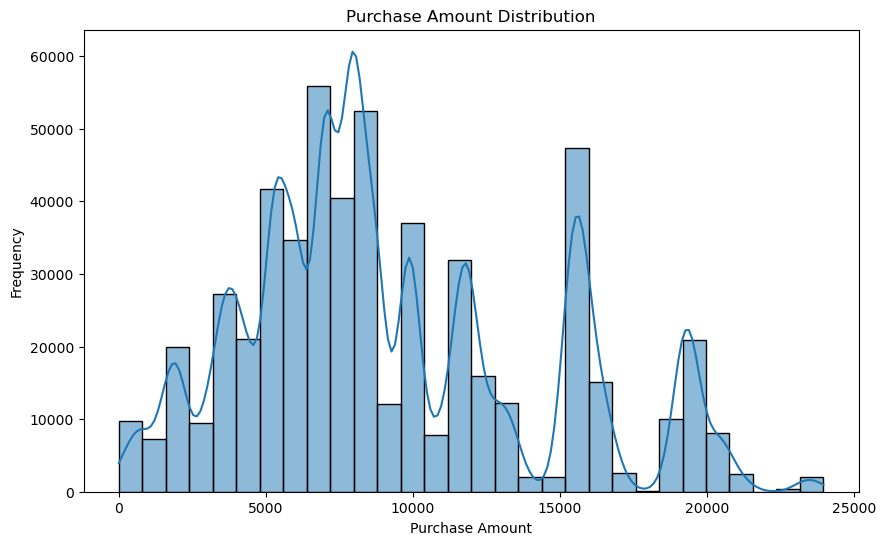

In [28]:
#Purchase distribution
plt.figure(figsize=(10, 6))
sns.histplot(sales['Purchase'], bins=30, kde=True)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.savefig('purchase_distribution.png')
plt.show()


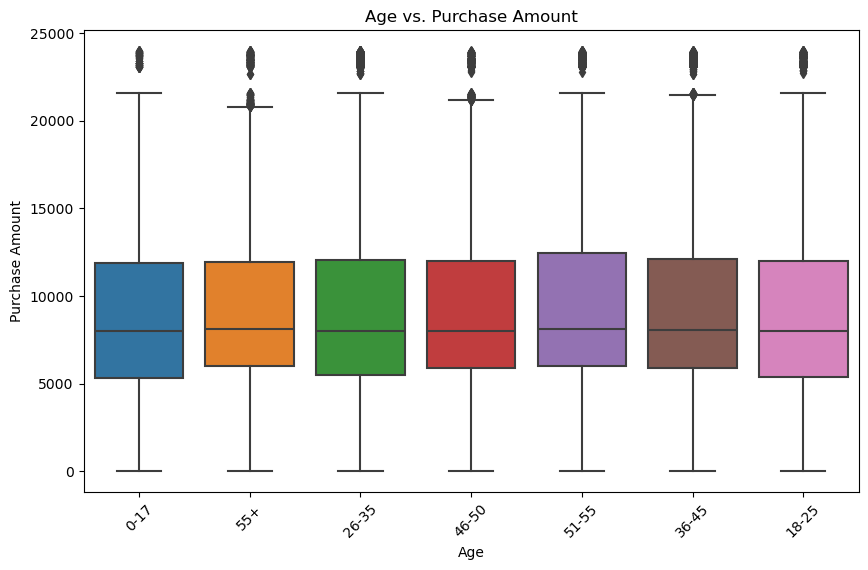

In [29]:
# Exploring Age and purchase amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=sales)
plt.title('Age vs. Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.savefig('age_analysis.png')
plt.show()

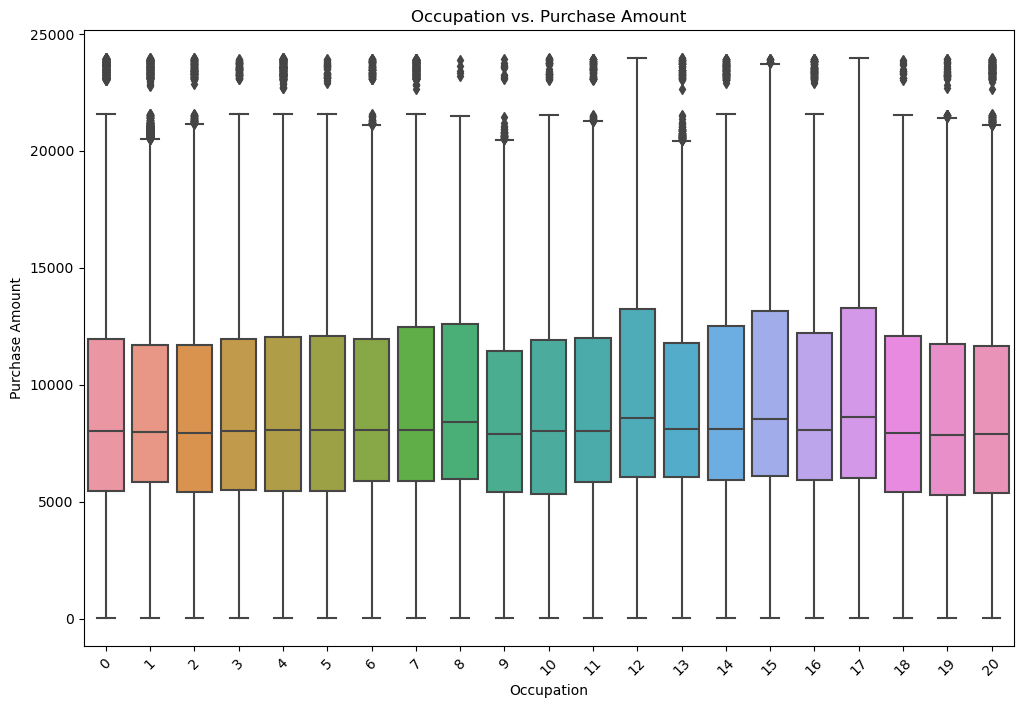

In [30]:
# Occupation across Purchase amount
plt.figure(figsize=(12, 8))
sns.boxplot(x='Occupation', y='Purchase', data=sales)
plt.title('Occupation vs. Purchase Amount')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.savefig('occupation_analysis.png')
plt.show()

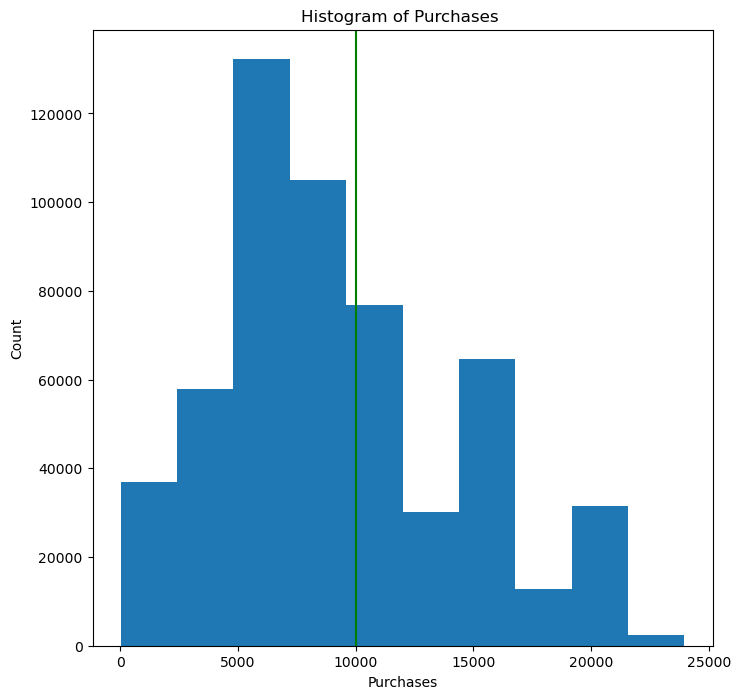

In [31]:
plt.figure(figsize=(8,8))
plt.hist(x=sales["Purchase"],bins=10)
plt.title("Histogram of Purchases ")
plt.xlabel("Purchases")
plt.ylabel("Count")
plt.axvline(10000,color = 'g')
plt.savefig('histogram of Purchase.jpeg')
plt.show()

# Data Modelling

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [33]:
# 1. Separating the data into predictor variables (X) and target variable (y)
X = sales.drop(['User_ID', 'Product_ID', 'Purchase', 'Age'], axis =1)

y = sales['Purchase']

In [34]:
X

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,F,10,A,2,0,3,9.842329
1,F,10,A,2,0,1,6.000000
2,F,10,A,2,0,12,9.842329
3,F,10,A,2,0,12,14.000000
4,M,16,C,4,0,8,9.842329
...,...,...,...,...,...,...,...
550063,M,13,B,1,1,20,9.842329
550064,F,1,C,3,0,20,9.842329
550065,F,15,B,4,1,20,9.842329
550066,F,1,C,2,0,20,9.842329


In [35]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['Gender', 'City_Category']

for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [36]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

## Linear Regression Model

In [37]:
#Instantiate the linear regression model
lr = LinearRegression()

In [38]:
#Train our linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
print("lr.coef_: {}\n".format(lr.coef_))

print("lr.intercept_: {}\n".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [ 492.84540408    9.16268468  370.84757947   12.54416542   32.12289688
 -411.09985409  -69.09105903]

lr.intercept_: 11298.539978395433

Training set score: 0.13
Test set score: 0.12


In [40]:
y_pred = lr.predict(X_test)

In [41]:
#checking the error that exist between predicted values and actual values

mse = mean_squared_error(y_test,y_pred)

In [42]:
mse

22016664.895346217

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")